In [123]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('housepricedata.csv')

In [124]:
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [125]:
def DataReport(df):
    print(f"Dataset Shape: {df.shape}")
    data_info  = pd.DataFrame(df.dtypes,columns=['dtypes'])
    data_info  = data_info .reset_index()
    data_info ['Name'] = data_info ['index']
    data_info  = data_info [['Name','dtypes']]
    data_info ['Missing'] = df.isnull().sum().values
    data_info ['Uniques'] = df.nunique().values
    data_info ['First Value'] = df.loc[0].values
    data_info ['Second Value'] = df.loc[1].values
    return data_info
DataReport(df)


Dataset Shape: (1460, 11)


,Name,dtypes,Missing,Uniques,First Value,Second Value
0,LotArea,int64,0,1073,8450,9600
1,OverallQual,int64,0,10,7,6
2,OverallCond,int64,0,9,5,8
3,TotalBsmtSF,int64,0,721,856,1262
4,FullBath,int64,0,4,2,2
5,HalfBath,int64,0,3,1,0
6,BedroomAbvGr,int64,0,8,3,3
7,TotRmsAbvGrd,int64,0,12,8,6
8,Fireplaces,int64,0,4,0,1
9,GarageArea,int64,0,441,548,460


0    732
1    728
Name: AboveMedianPrice, dtype: int64

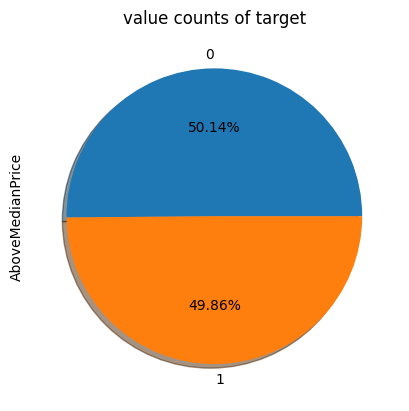

In [126]:
#visualizing with a pie chart to check whether the data (train dataset) is balanced
target_counts= df['AboveMedianPrice'].value_counts()
target_counts.plot(kind= 'pie', autopct= '%1.2f%%', shadow= True)
plt.title('value counts of target')
df['AboveMedianPrice'].value_counts()

Balanced data set

In [107]:
# Extract the target variable (Y) and features (X)
Y = df['AboveMedianPrice'].values
X = df.drop(['AboveMedianPrice'], axis=1).values
# Now, X and Y are NumPy arrays containing the data


In [108]:
from sklearn import preprocessing

In [82]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [83]:
X_scale


array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

<Axes: >

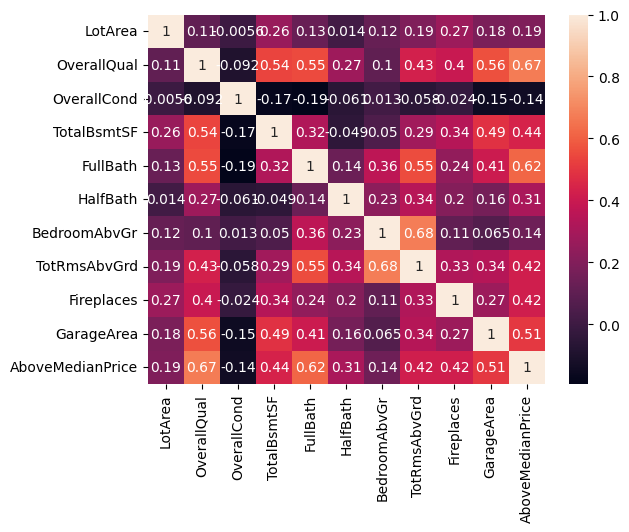

In [110]:
import seaborn as sns
sns.heatmap(df.corr(), annot= True)

we cant drop any feature,as all are less inter correlated 

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)


(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


**Neural Network**

Model-1


In [116]:
from keras.models import Sequential
from keras.layers import Dense
## Model Architecture
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),             ##input has 10 feature 
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),     ##binary classification                    
])

In [119]:
model.compile(
    optimizer='sgd',             # Stochastic Gradient Descent optimizer
    loss='binary_crossentropy',  # Binary Cross-Entropy loss function
    metrics=['accuracy']         # Accuracy metric to track during training
)


we use binary cross-entropy as the loss function, which is common for binary classification tasks.

In [91]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100


32/32 [==============================] - 1s 11ms/step - loss: 0.6812 - accuracy: 0.5861 - val_loss: 0.6707 - val_accuracy: 0.7169
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6734 - accuracy: 0.6654 - val_loss: 0.6620 - val_accuracy: 0.7078
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6660 - accuracy: 0.6556 - val_loss: 0.6547 - val_accuracy: 0.7580
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6587 - accuracy: 0.7045 - val_loss: 0.6471 - val_accuracy: 0.7900
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6512 - accuracy: 0.7554 - val_loss: 0.6385 - val_accuracy: 0.7945
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6426 - accuracy: 0.7750 - val_loss: 0.6290 - val_accuracy: 0.8037
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6340 - accuracy: 0.8072 - val_loss: 0.6200 - val_accuracy: 0.8128
Epoch 8/100
32/32 [=====

In [120]:

# target_accuracy = 0.9  # Set the desired accuracy threshold

# current_accuracy = 0.0
# epochs = 0

# while current_accuracy < target_accuracy:
#     history = model.fit(X_train, Y_train, batch_size=32, epochs=1, validation_data=(X_val, Y_val))
    
#     # Update the current accuracy
#     current_accuracy = history.history['val_accuracy'][0]
#     epochs += 1

# print(f"Reached target accuracy of {target_accuracy} after {epochs} epochs.")

32/32 [==============================] - 0s 5ms/step - loss: 0.3237 - accuracy: 0.8728 - val_loss: 0.2738 - val_accuracy: 0.9041
Reached target accuracy of 0.9 after 71 epochs.


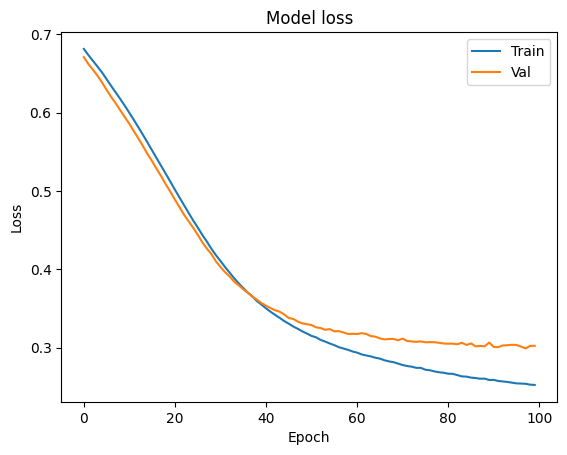

In [121]:
plt.plot(hist.history['loss']) # Plot the training loss
plt.plot(hist.history['val_loss']) # Plot the validation loss
plt.title('Model loss')    #title of the plot
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

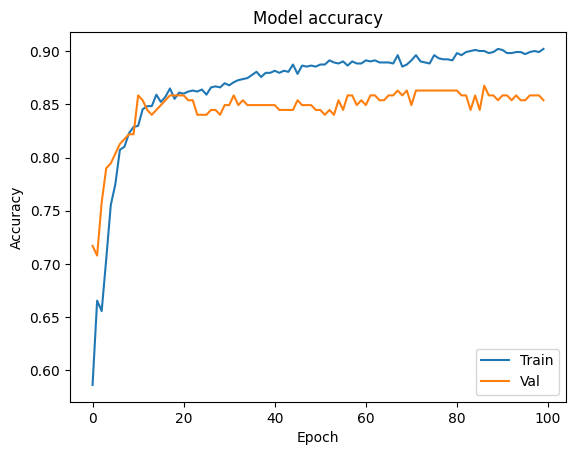

In [122]:
plt.plot(hist.history['accuracy']) # Plot the training accuracy 
plt.plot(hist.history['val_accuracy']) # Plot the validation accuracy 
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

**Model 2**


 we use Adam optimizer, which is a popular optimization algorithm that often converges faster than stochastic gradient descent (SGD).

In [95]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',                
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,             ## It specifies that mini-batches of size 32 will be used during training.
          validation_data=(X_val, Y_val))       

Epoch 1/100
32/32 [==============================] - 3s 58ms/step - loss: 0.4451 - accuracy: 0.8170 - val_loss: 0.4193 - val_accuracy: 0.8356
Epoch 2/100
32/32 [==============================] - 1s 43ms/step - loss: 0.3189 - accuracy: 0.8708 - val_loss: 0.3732 - val_accuracy: 0.8493
Epoch 3/100
32/32 [==============================] - 1s 46ms/step - loss: 0.2697 - accuracy: 0.8885 - val_loss: 0.4199 - val_accuracy: 0.8447
Epoch 4/100
32/32 [==============================] - 2s 50ms/step - loss: 0.2592 - accuracy: 0.8904 - val_loss: 0.4166 - val_accuracy: 0.8493
Epoch 5/100
32/32 [==============================] - 2s 50ms/step - loss: 0.2611 - accuracy: 0.9002 - val_loss: 0.3036 - val_accuracy: 0.8584
Epoch 6/100
32/32 [==============================] - 2s 48ms/step - loss: 0.2431 - accuracy: 0.9070 - val_loss: 0.3056 - val_accuracy: 0.8904
Epoch 7/100
32/32 [==============================] - 2s 76ms/step - loss: 0.2531 - accuracy: 0.8992 - val_loss: 0.2985 - val_accuracy: 0.8630
Epoch 

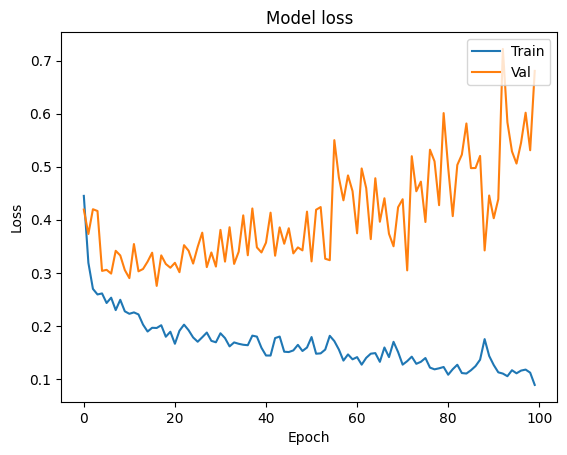

In [96]:
plt.plot(hist_2.history['loss']) # Plot the training loss 
plt.plot(hist_2.history['val_loss']) # Plot the validation loss
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

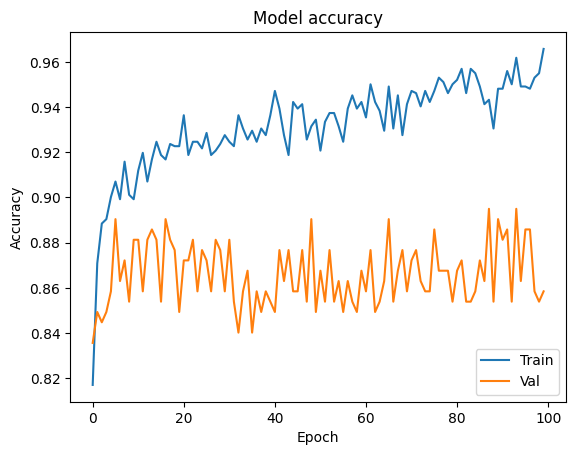

In [97]:
plt.plot(hist_2.history['accuracy'])  # Plot the training accuracy
plt.plot(hist_2.history['val_accuracy'])  # Plot the validation accuracy 
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

model is overfitted so to avoid this we add regularization

**Model 3**

adding Regularization term to our model  

In [98]:
from keras.layers import Dropout    ##to prevent overfitting
from keras import regularizers

In [99]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [100]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 6s 90ms/step - loss: 14.2759 - accuracy: 0.6331 - val_loss: 3.9414 - val_accuracy: 0.8493
Epoch 2/100
32/32 [==============================] - 2s 78ms/step - loss: 1.6967 - accuracy: 0.8180 - val_loss: 0.6672 - val_accuracy: 0.8539
Epoch 3/100
32/32 [==============================] - 3s 79ms/step - loss: 0.5468 - accuracy: 0.8708 - val_loss: 0.5078 - val_accuracy: 0.8630
Epoch 4/100
32/32 [==============================] - 2s 75ms/step - loss: 0.4773 - accuracy: 0.8875 - val_loss: 0.5565 - val_accuracy: 0.8539
Epoch 5/100
32/32 [==============================] - 2s 67ms/step - loss: 0.4787 - accuracy: 0.8836 - val_loss: 0.5026 - val_accuracy: 0.8630
Epoch 6/100
32/32 [==============================] - 2s 77ms/step - loss: 0.4667 - accuracy: 0.8836 - val_loss: 0.4924 - val_accuracy: 0.8721
Epoch 7/100
32/32 [==============================] - 2s 76ms/step - loss: 0.4523 - accuracy: 0.8943 - val_loss: 0.4724 - val_accuracy: 0.8584
Epoch

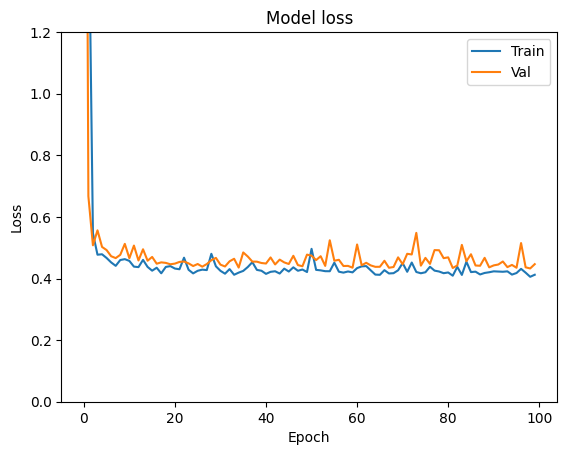

In [101]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

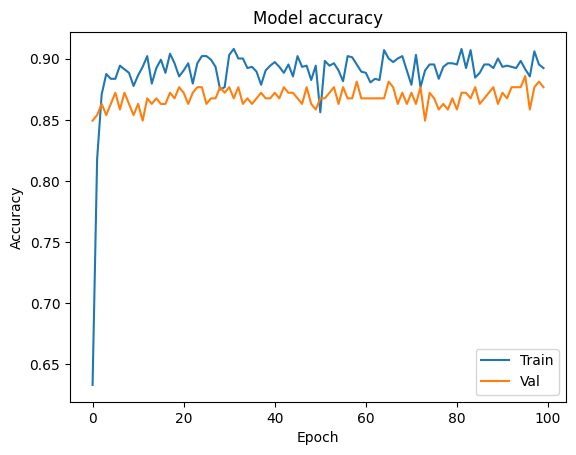

In [102]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

Yes we made our Neural Network without Overfitting ver much 